In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/gdrive')


pd.set_option('max_colwidth', 999)
pd.set_option('max_rows', 50)

Mounted at /gdrive


In [3]:
PATH = "/gdrive/MyDrive/MLDM/Data Mining/Project/data"

df_train = pd.read_pickle(PATH + "/DataFrame_train_preprocessing_V2.pkl")
idx_train = np.load(PATH + "/array_idx_train.npy")
df_train = df_train.reset_index(drop=True)



val_bool   = np.load(PATH + "/encodings/val_bool.npy")
train_bool = np.load(PATH + "/encodings/train_bool.npy")
test_bool  = np.load(PATH + "/encodings/test_bool.npy")

val_tf   = np.load(PATH + "/encodings/val_tf.npy")
train_tf = np.load(PATH + "/encodings/train_tf.npy")
test_tf  = np.load(PATH + "/encodings/test_tf.npy")

val_tfidf   = np.load(PATH + "/encodings/val_tfidf.npy")
train_tfidf = np.load(PATH + "/encodings/train_tfidf.npy")
test_tfidf  = np.load(PATH + "/encodings/test_tfidf.npy")

In [4]:
from sklearn.decomposition import PCA, KernelPCA

#===== PCA =====
algo = KernelPCA(n_components=2, kernel='linear')
X_pca_bool = algo.fit_transform(train_bool)

algo = KernelPCA(n_components=2, kernel='linear')
X_pca_tf = algo.fit_transform(train_tf)

algo = KernelPCA(n_components=2, kernel='linear')
X_pca_tfidf = algo.fit_transform(train_tfidf)


#===== Kernel PCA =====
algo = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)
X_kpca_bool = algo.fit_transform(train_bool)

algo = KernelPCA(n_components=2, kernel='rbf', gamma=0.005)
X_kpca_tf = algo.fit_transform(train_tf)

algo = KernelPCA(n_components=2, kernel='rbf', gamma=0.01)
X_kpca_tfidf = algo.fit_transform(train_tfidf)

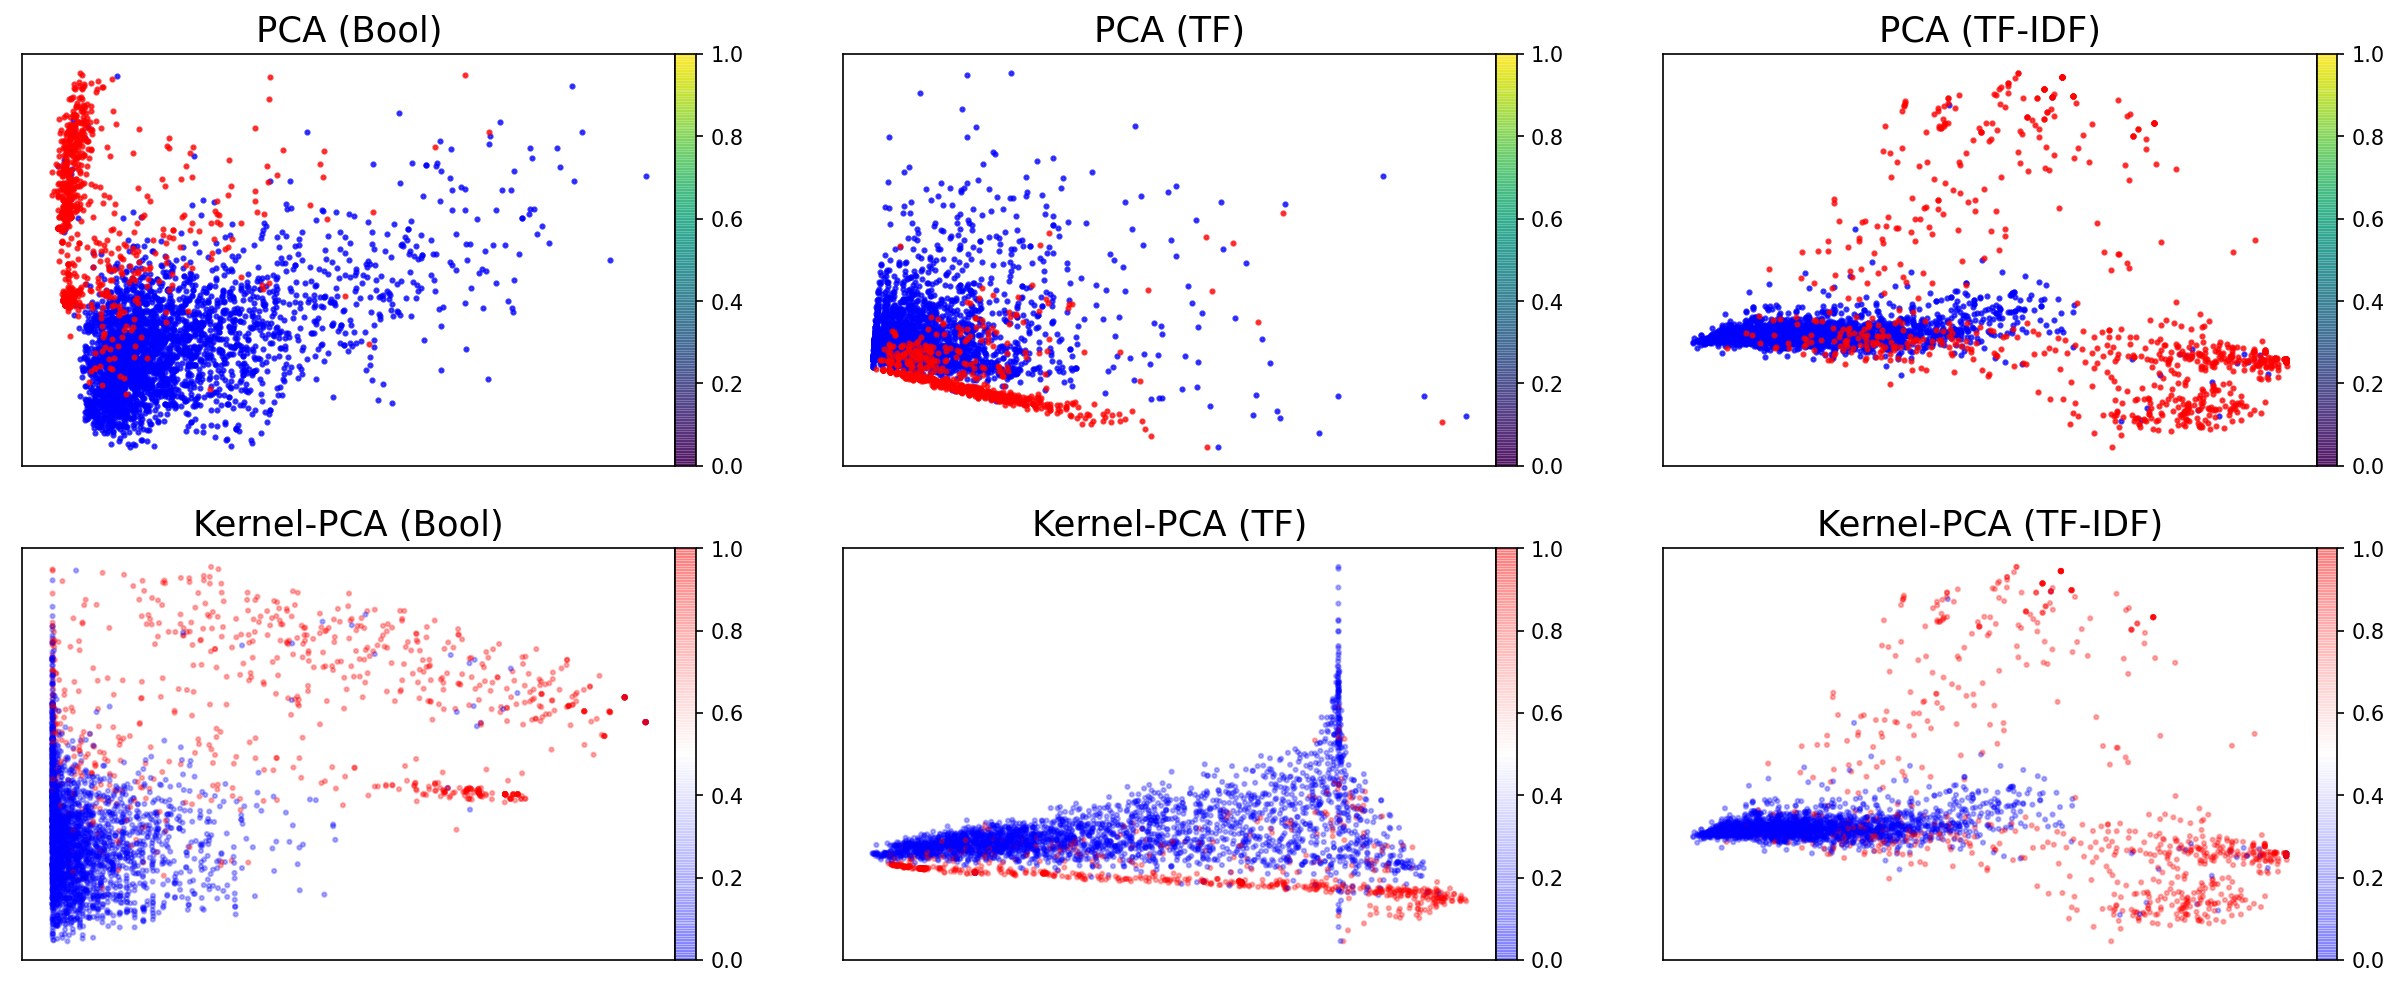

In [6]:
plt.figure(figsize=(20,8), dpi=150)

plt.subplot(231)
plt.scatter(X_pca_bool[:,0][df_train.iloc[idx_train]['label'] == 0], X_pca_bool[:,1][df_train.iloc[idx_train]['label'] == 0], alpha=0.7, color='b', s=4, cmap='bwr')  # Colored by the feature values
plt.scatter(X_pca_bool[:,0][df_train.iloc[idx_train]['label'] == 1], X_pca_bool[:,1][df_train.iloc[idx_train]['label'] == 1], alpha=0.7, color='r', s=4, cmap='bwr')  # Colored by the feature values
plt.title(f"PCA (Bool)", fontsize=17)
plt.colorbar(fraction=0.045, pad=0.00)
plt.xticks([]);plt.yticks([])

plt.subplot(232)
plt.scatter(X_pca_tf[:,0][df_train.iloc[idx_train]['label'] == 0], X_pca_tf[:,1][df_train.iloc[idx_train]['label'] == 0], alpha=0.7, color='b', s=4, cmap='bwr')  # Colored by the feature values
plt.scatter(X_pca_tf[:,0][df_train.iloc[idx_train]['label'] == 1], X_pca_tf[:,1][df_train.iloc[idx_train]['label'] == 1], alpha=0.7, color='r', s=4, cmap='bwr')  # Colored by the feature values
plt.title(f"PCA (TF)", fontsize=17)
plt.colorbar(fraction=0.045, pad=0.00)
plt.xticks([]);plt.yticks([])

plt.subplot(233)
plt.scatter(X_pca_tfidf[:,0][df_train.iloc[idx_train]['label'] == 0], X_pca_tfidf[:,1][df_train.iloc[idx_train]['label'] == 0], alpha=0.7, color='b', s=4, cmap='bwr')  # Colored by the feature values
plt.scatter(X_pca_tfidf[:,0][df_train.iloc[idx_train]['label'] == 1], X_pca_tfidf[:,1][df_train.iloc[idx_train]['label'] == 1], alpha=0.7, color='r', s=4, cmap='bwr')  # Colored by the feature values
plt.title(f"PCA (TF-IDF)", fontsize=17)
plt.colorbar(fraction=0.045, pad=0.00)
plt.xticks([]);plt.yticks([])



plt.subplot(234)
plt.scatter(X_kpca_bool[:,0], X_pca_bool[:,1], alpha=0.3, c=df_train.iloc[idx_train]['label'], s=4, cmap='bwr')  # Colored by the feature values
plt.title(f"Kernel-PCA (Bool)", fontsize=17)
plt.colorbar(fraction=0.045, pad=0.00)
plt.xticks([]);plt.yticks([])

plt.subplot(235)
plt.scatter(X_kpca_tf[:,0], X_pca_tf[:,1], alpha=0.3, c=df_train.iloc[idx_train]['label'], s=4, cmap='bwr')  # Colored by the feature values
plt.title(f"Kernel-PCA (TF)", fontsize=17)
plt.colorbar(fraction=0.045, pad=0.00)
plt.xticks([]);plt.yticks([])

plt.subplot(236)
plt.scatter(X_kpca_tfidf[:,0], X_pca_tfidf[:,1], alpha=0.3, c=df_train.iloc[idx_train]['label'], s=4, cmap='bwr')  # Colored by the feature values
plt.title(f"Kernel-PCA (TF-IDF)", fontsize=17)
plt.colorbar(fraction=0.045, pad=0.00)
plt.xticks([]);plt.yticks([])

plt.show()